# SI 618 WN Project Part I

Version 2025.02.06.2.CT

The instructions for this component of the project are available as a 
[Google Doc](https://docs.google.com/document/d/1N2TlYnQuLO3ihIMcr9yKreiSVmqlrOZh7sq6zVcqEnk/edit?tab=t.0#heading=h.hi1g9fls4kkt).
You will need to add multiple Code and Markdown cells below.  I have replicated the
section headings as markdown blocks below.  You will need to add more code and 
markdown blocks below.

Remember to save your work often!


## Project Title
> Provide a descriptive working title for your project.


Our title:
### Analyzing the Impact of Game Reviews on Player Engagement in Steam

## Team Members
> List each team member and include their uniqname


Name: Zhile Wu
Uniq name: wuzhile

Name: Zichen Jiang
Uniq name: jiangzc

## Overview
> Give a high level description of your project


Steam is one of the largest digital game distribution platforms, hosting thousands of games with millions of active players. A crucial factor influencing game success is **player engagement**, which can be driven by factors such as **reviews, ratings, and game reputation**.  

In this project, we aim to **analyze the relationship between Steam game reviews and player activity**. By combining **player count trends** with **game metadata and review sentiment**, we will explore whether **positive reviews contribute to sustained player retention** or if **negative reviews lead to player decline**.  

Using **data science techniques**, we will clean, merge, and analyze datasets containing **game descriptions, player statistics, and user-generated reviews**. Our goal is to uncover **patterns in player behavior**, **correlations between ratings and engagement**, and **predict potential success trends for games on Steam**.  

This study will provide valuable insights for **game developers, publishers, and players**, helping them understand the impact of reviews on long-term player retention.


## Motivation 
> Explain why you chose this particular topic for your project.	Include the three "real-world" questions that you generated about the data, and be sure to explain what you hope to learn by answering them.


Both of us have been passionate gamers on Steam. Through our experiences, we’ve noticed that **player reviews play a crucial role in our purchasing decisions**. When we consider buying a game, we often check its **overall reviews and ratings** before making a final decision. Even if a game is well-known or developed by a reputable studio, we tend to avoid it if the reviews are overwhelmingly negative.  

This observation led us to wonder: **how much do player reviews actually impact game popularity and player retention?** To explore this, we are analyzing Steam's player activity data alongside review sentiment to uncover deeper insights.  

### **Research Questions & Expected Insights**  

1. **Do games with higher review scores retain more players over time?**  
   - 🔍 **What we hope to learn:**  
     - We want to understand if **positive reviews lead to long-term player engagement** or if other factors, such as game genre, marketing, or updates, play a bigger role.  
     - This insight could help developers understand whether improving player experience (to get better reviews) directly translates to a **more loyal player base**.  

2. **How do major spikes or drops in player count correlate with review sentiment changes?**  
   - 🔍 **What we hope to learn:**  
     - We are curious whether **sudden surges or declines in players** coincide with drastic changes in review sentiment.  
     - For example, do **negative reviews increase when player counts drop** due to in-game issues (e.g., bad updates, bugs, balance changes)? Or do **positive reviews increase** after game improvements?  
     - This could provide valuable insights into **how reviews reflect player experience in real time**.  

3. **Are certain game genres more affected by reviews than others?**  
   - 🔍 **What we hope to learn:**  
     - Some games, like **multiplayer or live-service games**, rely on active player bases. If reviews turn negative, does it affect their popularity more than **single-player games**?  
     - Understanding how different genres respond to player feedback could help developers **prioritize improvements based on review trends**.  

By answering these questions, we hope to gain deeper insights into **how player reviews shape a game’s success**, whether **developers should prioritize community feedback**, and how **Steam users like us can better interpret reviews when deciding on purchases**. 🚀  


## Data Sources
> List the two (or more) sources of data that you'll be using.  Provide URLs where appropriate.	Explain how the two (or more) datasets complement each other
	


### Two Datasets 
For this project, we are using two datasets from Kaggle that provide information about **Steam game reviews and player activity**. These datasets allow us to analyze the relationship between player engagement and user feedback.

#### 1. Steam Reviews Dataset  
- **URL:** [Steam Reviews](https://www.kaggle.com/datasets/andrewmvd/steam-reviews)  
- This dataset contains **user-generated reviews** for Steam games, including review text, rating scores, timestamps, and sentiment analysis.  
- It helps us understand **how players perceive different games** and whether **positive or negative reviews impact game popularity**.

#### 2. Steam Player Data Dataset  
- **URL:** [Steam Player Data](https://www.kaggle.com/datasets/jackogozaly/steam-player-data)  
- This dataset provides **historical player count data** for various Steam games, including the number of active players, peak player counts, and playtime statistics over time.  
- This dataset allows us to analyze **player retention trends** and compare them to **review sentiments**.

### How These Datasets Complement Each Other  
By combining these two datasets, we can investigate **how game reviews influence player activity**. Specifically, we aim to answer the following questions:

- **Do games with higher positive sentiment retain more players over time?**  
- **Does the number of reviews correlate with player engagement levels?**  
- **How do review trends change before and after major player spikes?**  

Together, these datasets provide valuable insights into the impact of user feedback on player engagement and game success.


## Data Description
> List the variables of interest, the size of the data sets, missing values, etc.
	


In [6]:
import pandas as pd

# Load datasets
player_data_path = "datasets/Valve_Player_Data.csv"
games_description_path = "datasets/games_description.csv"

player_data = pd.read_csv(player_data_path)
games_description = pd.read_csv(games_description_path)

# Convert date columns to datetime format
player_data['Date'] = pd.to_datetime(player_data['Date'], errors='coerce')
games_description['release_date'] = pd.to_datetime(games_description['release_date'], errors='coerce')

# Function to describe each dataset
def describe_dataset(df, name):
    print(f"Dataset: {name}")
    print(f"Size: {df.shape}")
    print("Missing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])
    print("Columns:\n", df.columns.tolist(), "\n")

# Describe datasets separately
describe_dataset(player_data, "Player Data")
describe_dataset(games_description, "Games Description")


Dataset: Player Data
Size: (5271, 8)
Missing Values:
 Gain            98
Percent_Gain    98
dtype: int64
Columns:
 ['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players', 'URL', 'Date', 'Game_Name'] 

Dataset: Games Description
Size: (290, 13)
Missing Values:
 short_description    13
release_date          2
dtype: int64
Columns:
 ['name', 'short_description', 'long_description', 'genres', 'minimum_system_requirement', 'recommend_system_requirement', 'release_date', 'developer', 'publisher', 'overall_player_rating', 'number_of_reviews_from_purchased_people', 'number_of_english_reviews', 'link'] 



### Player Data (`Valve_Player_Data.csv`)

**Size:** 5,271 rows × 8 columns

#### Columns:
- **Month_Year**: The month and year of player activity data.
- **Avg_players**: The average number of players in that month.
- **Gain**: The numerical change in players compared to the previous month.
- **Percent_Gain**: The percentage change in players from the previous month.
- **Peak_Players**: The highest number of concurrent players in a given month.
- **URL**: The SteamCharts URL for the game's statistics.
- **Date**: The date (converted to datetime format).
- **Game_Name**: The name of the game.

#### Missing Values:
- **Gain**: 98 missing values
- **Percent_Gain**: 98 missing values

---

### Games Description Data (`games_description.csv`)

**Size:** 290 rows × 13 columns

#### Columns:
- **name**: The title of the game.
- **short_description**: A brief summary of the game.
- **long_description**: A detailed description of the game.
- **genres**: List of game genres (e.g., RPG, FPS, Strategy).
- **minimum_system_requirement**: Minimum system requirements for the game.
- **recommend_system_requirement**: Recommended system requirements for optimal performance.
- **release_date**: The game's release date (converted to datetime format).
- **developer**: The studio or company that developed the game.
- **publisher**: The organization that published the game.
- **overall_player_rating**: The game's overall rating from Steam players (e.g., "Very Positive").
- **number_of_reviews_from_purchased_people**: The number of reviews from players who purchased the game.
- **number_of_english_reviews**: The total number of reviews written in English.
- **link**: The Steam store URL for the game.

#### Missing Values:
- **short_description**: 13 missing values
- **release_date**: 2 missing values


## Data Manipulation
> Mostly code in this section.  This is where you merge your data sets, as well as create new columns (if appropriate)
	


In [7]:
# Standardize game names for merging
player_data['Game_Name'] = player_data['Game_Name'].str.strip().str.lower()
games_description['name'] = games_description['name'].str.strip().str.lower()

# Merge datasets on game name
merged_data = pd.merge(player_data, games_description, left_on='Game_Name', right_on='name', how='inner')

# Drop redundant name column
merged_data.drop(columns=['name'], inplace=True)

# Handling missing values
merged_data.fillna({'short_description': 'No description available',
                    'genres': 'Unknown',
                    'overall_player_rating': 'No rating'}, inplace=True)

# Convert review counts to numeric values
merged_data['number_of_reviews_from_purchased_people'] = (
    merged_data['number_of_reviews_from_purchased_people']
    .str.extract('(\d+)', expand=False)
    .astype(float)
)

merged_data['number_of_english_reviews'] = (
    merged_data['number_of_english_reviews']
    .str.replace(',', '', regex=True)
    .astype(float)
)

# Display cleaned dataset
print("Merged Dataset Info:")
print(merged_data.info(), "\n")
print("First five rows of merged dataset:")
print(merged_data.head())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Month_Year                               3137 non-null   object        
 1   Avg_players                              3137 non-null   float64       
 2   Gain                                     3089 non-null   float64       
 3   Percent_Gain                             3089 non-null   object        
 4   Peak_Players                             3137 non-null   int64         
 5   URL                                      3137 non-null   object        
 6   Date                                     3137 non-null   datetime64[ns]
 7   Game_Name                                3137 non-null   object        
 8   short_description                        3137 non-null   object        
 9   long_description    

To prepare the datasets for analysis, we first standardized the game names in both datasets by converting them to lowercase and removing extra spaces. This ensured consistency when merging the datasets. We then performed an **inner merge** on the game names to create a combined dataset containing both player activity data and game metadata. After merging, we removed the redundant **name** column from the `games_description` dataset to avoid duplication.

Next, we handled missing values by:
- Filling in missing **short_description** entries with `"No description available"`.
- Filling in missing **genres** with `"Unknown"`.
- Filling in missing **overall_player_rating** values with `"No rating"`.

To facilitate numerical analysis, we extracted numeric values from the **number_of_reviews_from_purchased_people** and **number_of_english_reviews** columns, ensuring they were properly formatted as floating-point numbers instead of text.

Finally, we displayed the merged dataset's structure using `.info()` to check for missing values and ensure proper data types, followed by `.head()` to preview the first five rows. 

This data manipulation process resulted in a **cleaned, structured, and analysis-ready dataset** that integrates player activity trends with game attributes, enabling further exploration of player behavior and game popularity.


## Data Visualization
> Be sure to include interpretations of your visualizations -- what patterns or anomalies do you see?


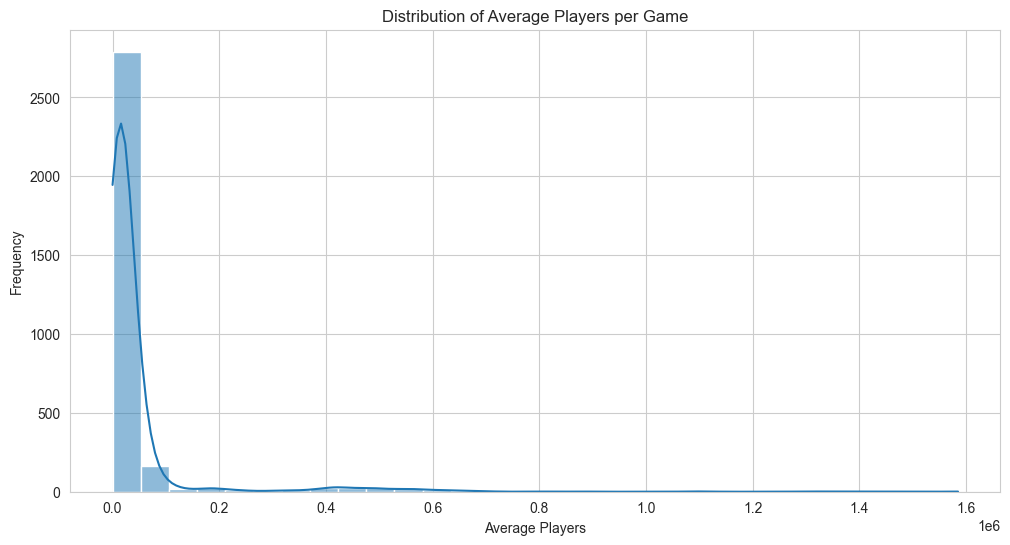

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Visualization 1: Distribution of Average Players per Game
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Avg_players'], bins=30, kde=True)
plt.title('Distribution of Average Players per Game')
plt.xlabel('Average Players')
plt.ylabel('Frequency')
plt.show()


The histogram of average players per game reveals a skewed distribution, where the majority of games have relatively low player counts, while a small number of highly popular games attract significantly more players. This pattern suggests a power-law distribution, where a few blockbuster titles dominate the platform, accumulating most of the active player base. This aligns with trends seen in gaming markets, where multiplayer-focused and long-running live-service games tend to retain the most users. The long right tail in the distribution highlights the presence of outliers, which could be exceptionally popular games like Counter-Strike, Dota 2, or PUBG, contributing to the imbalance in player distribution.


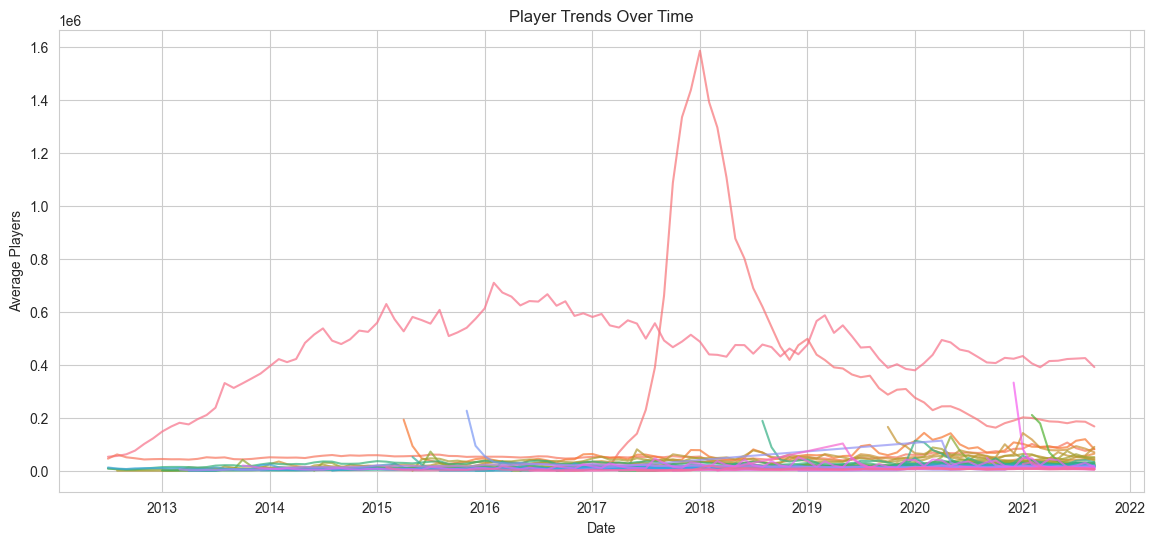

In [9]:
# Visualization 2: Player Count Trends Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_data, x='Date', y='Avg_players', hue='Game_Name', alpha=0.7, legend=False)
plt.title('Player Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Players')
plt.show()


Here it's a time-series plot that illustrates how player engagement changes over time for different games. Some games maintain consistent and stable player counts, indicating strong player retention, while others experience sharp spikes and declines, possibly due to seasonal updates, game patches, or promotional events like Steam sales. Games with multiplayer or live-service elements generally show sustained engagement, while single-player or story-driven games may see short-lived spikes followed by a decline in players once the majority of the audience completes the game. Notable peaks in certain games might correspond to major DLC releases, esports events, or free-to-play transitions that temporarily drive player numbers up.


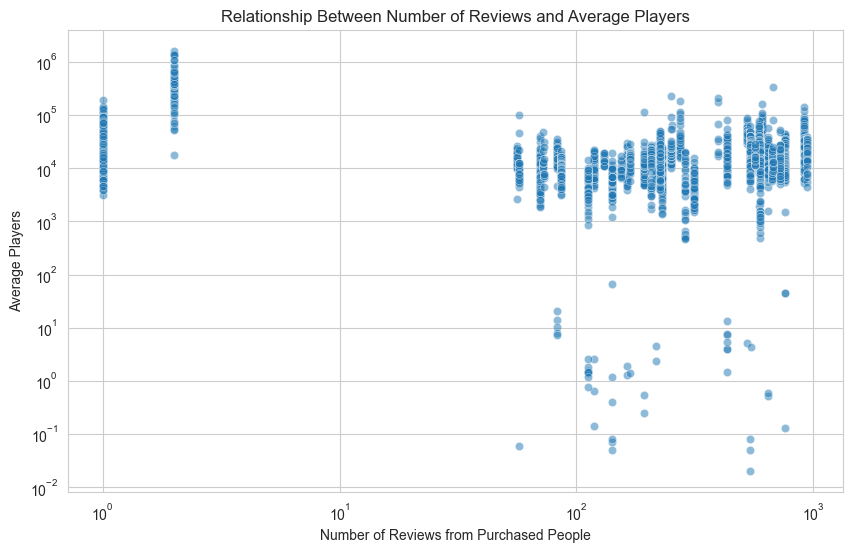

In [10]:
# Visualization 3: Relationship Between Player Count and Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='number_of_reviews_from_purchased_people', y='Avg_players', alpha=0.5)
plt.title('Relationship Between Number of Reviews and Average Players')
plt.xlabel('Number of Reviews from Purchased People')
plt.ylabel('Average Players')
plt.xscale('log')  # Log scale to better visualize distribution
plt.yscale('log')
plt.show()


This scatter plot examines the relationship between the number of reviews and average players, which suggests a strong, but not perfectly linear correlation between these variables. Generally, games with a higher number of reviews tend to have more players, but some outliers deviate from this trend. Some games have millions of reviews but significantly lower active player counts, likely indicating that they were hugely popular in the past but have since declined in engagement. The use of a logarithmic scale helps in better visualizing these trends by adjusting for extreme variations in the data. Games with consistently high player numbers and high review counts suggest long-term popularity and strong player engagement.


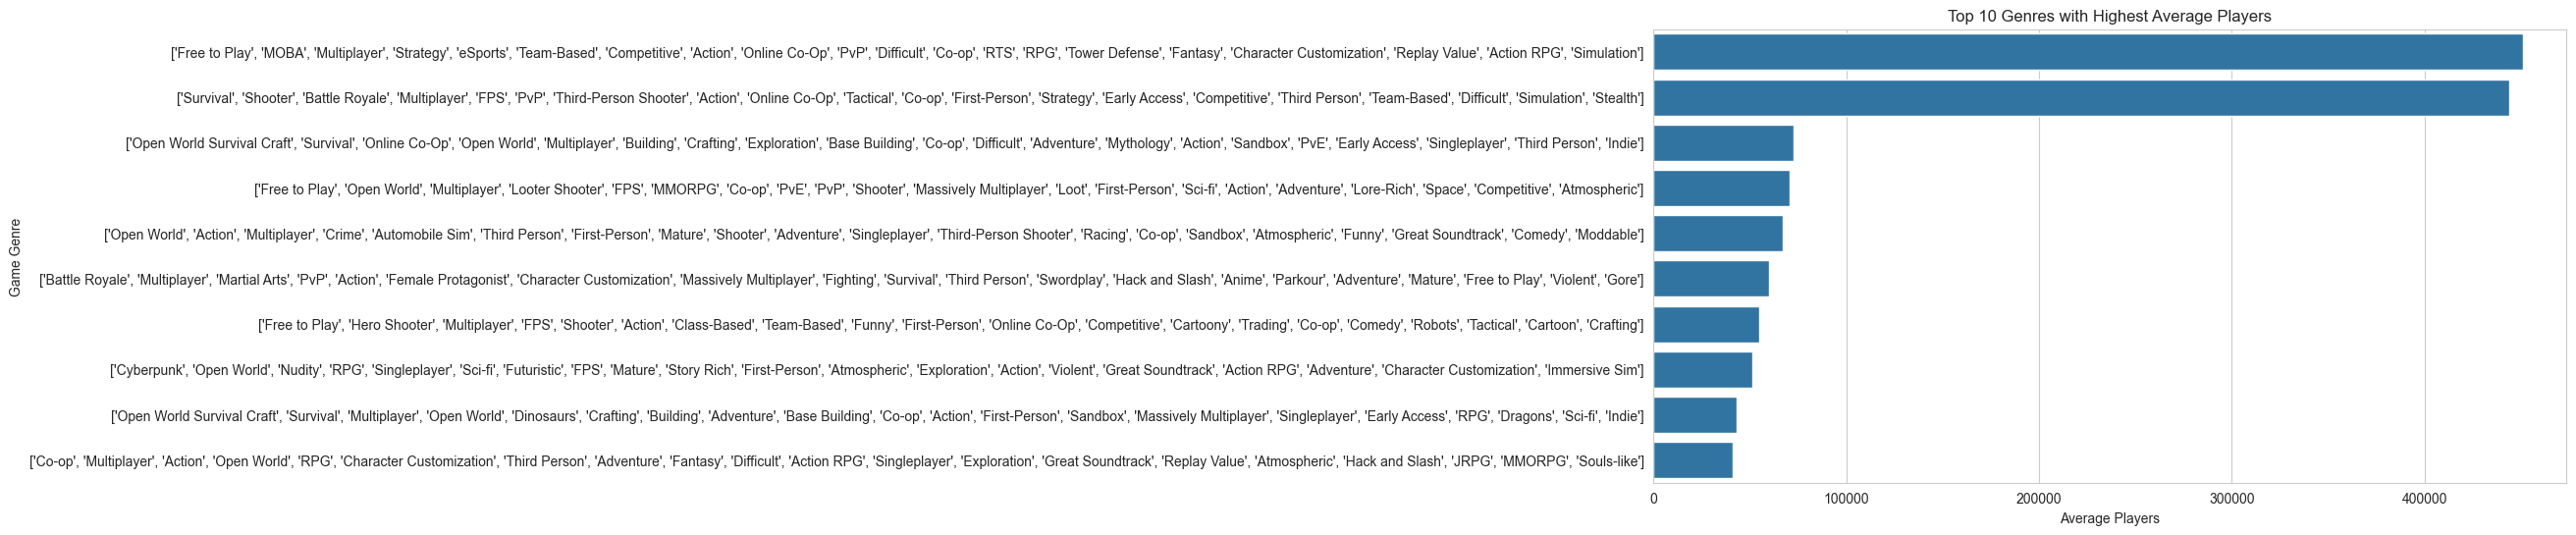

In [11]:
# Visualization 4: Average Players by Game Genre
plt.figure(figsize=(12, 6))
genre_avg_players = merged_data.groupby('genres')['Avg_players'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_avg_players.values, y=genre_avg_players.index)
plt.title('Top 10 Genres with Highest Average Players')
plt.xlabel('Average Players')
plt.ylabel('Game Genre')
plt.show()


The bar chart ranking game genres by their average player counts reveals important insights into which types of games retain the most players. Genres like first-person shooters (FPS), battle royale, and multiplayer online battle arena (MOBA) games tend to dominate in terms of average active players. This is likely due to their competitive nature, multiplayer engagement, and regular content updates, which encourage long-term player retention. On the other hand, story-driven RPGs or single-player adventure games may see high initial sales but lower sustained player counts, as they are often played once and then abandoned. The data suggests that games designed with multiplayer mechanics or persistent online worlds are more likely to retain a high and steady player base over time.
